# Speed Dating Project on Kaggle

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset

data = pd.read_csv("speed_dating_data.csv", encoding = "ISO-8859-1")

In [3]:
# Get some informations

data.shape

(8378, 195)

In [4]:
with pd.option_context('display.max_columns', None):
    display(data.describe(include = 'all'))

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


### Target = column "match"
1 = match<br/>
0 = no match

# EDA

## **Age of the participants**

In [6]:
age = data['age']

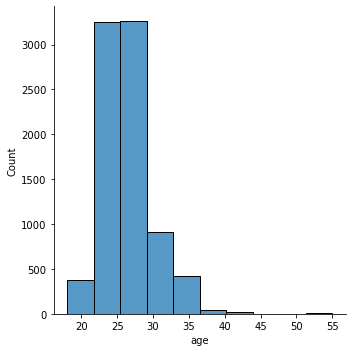

In [7]:
sns.displot(age, bins=10, kde=False)

### La majorité des participants ont entre 23 et 28 ans.

## **Gender**

In [18]:
display(data.groupby(['gender','match']).count())

iid    id   idg  condtn  wave  round  position  positin1  \
gender match                                                              
0      0      3494  3494  3494    3494  3494   3494      3494      2743   
       1       690   690   690     690   690    690       690       523   
1      0      3504  3503  3504    3504  3504   3504      3504      2743   
       1       690   690   690     690   690    690       690       523   

              order  partner  ...  attr3_3  sinc3_3  intel3_3  fun3_3  amb3_3  \
gender match                  ...                                               
0      0       3494     3494  ...     1799     1799      1799    1799    1799   
       1        690      690  ...      395      395       395     395     395   
1      0       3504     3504  ...     1472     1472      1472    1472    1472   
       1        690      690  ...      308      308       308     308     308   

              attr5_3  sinc5_3  intel5_3  fun5_3  amb5_3  
gender match                                              
0      0          910      910       910     910     910  
       1          204      204       204     204     204  
1      0          743      743       743     743     743  
       1          159      159       159     159     159  

[4 rows x 193 columns]

## **Ethnicity**

In [9]:
eth = data['race'].apply(lambda x : "Black/African American" if x == 1
                         else "European/Caucasian-American" if x == 2
                         else "Latino/Hispanic American" if x == 3 
                         else "Asian/Pacific Islander/Asian-American" if x == 4
                         else "Native American" if x == 5
                         else "Other")

In [10]:
pie_eth = eth.value_counts()
pie_eth

European/Caucasian-American              4727
Asian/Pacific Islander/Asian-American    1982
Latino/Hispanic American                  664
Other                                     585
Black/African American                    420
Name: race, dtype: int64

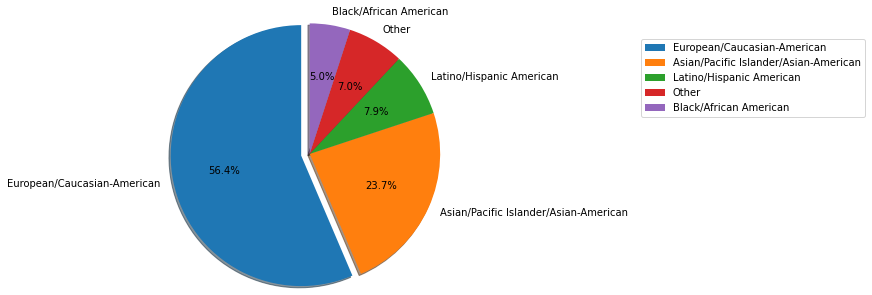

In [11]:
explode = (0.1,0,0,0,0)

plt.figure()
plt.pie(pie_eth.values, labels=pie_eth.index,  
       autopct='%1.1f%%',
       shadow=True,
        explode=explode,
       startangle=90,
       radius=1.5
       )
plt.legend(bbox_to_anchor=(2, 1.05))
plt.show()

### Plus de la moitié des participants sont d'origine ethnique européenne/ caucasienne-américaine.

## **Études**

In [12]:
study = data['field_cd'].apply(lambda x : "Law" if x == 1 
                               else "Math" if x == 2
                               else "Social Science, Psychologist" if x == 3
                               else "Medical Science, Pharmaceuticals, and Bio Tech" if x == 4
                               else "Engineering" if x == 5
                               else "English/Creative Writing/ Journalism" if x == 6
                               else "History/Religion/Philosophy" if x == 7
                               else "Business/Econ/Finance" if x == 8
                               else "Education, Academia" if x == 9
                               else "Biological Sciences/Chemistry/Physics" if x == 10
                               else "Social Work" if x == 11
                               else "Undergrad/undecided" if x == 12
                               else "Political Science/International Affairs" if x == 13
                               else "Film" if x == 14
                               else "Fine Arts/Arts Administration" if x == 15
                               else "Languages" if x == 16
                               else "Architecture" if x == 17
                               else "Other")

In [13]:
chart_study = study.value_counts()
chart_study

Business/Econ/Finance                             1925
Biological Sciences/Chemistry/Physics              993
Engineering                                        864
Political Science/International Affairs            709
Social Science, Psychologist                       696
Law                                                665
Education, Academia                                626
Social Work                                        468
English/Creative Writing/ Journalism               325
History/Religion/Philosophy                        241
Math                                               207
Fine Arts/Arts Administration                      187
Medical Science, Pharmaceuticals, and Bio Tech     143
Other                                              134
Film                                               126
Languages                                           40
Undergrad/undecided                                 19
Architecture                                        10
Name: fiel

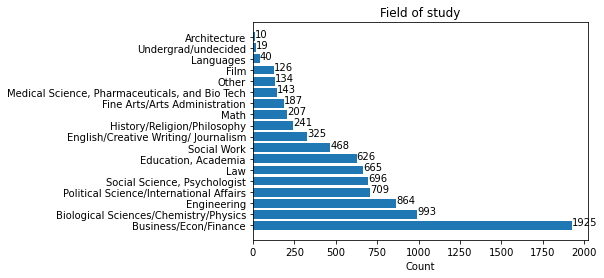

In [14]:
plt.title("Field of study")
plt.barh(chart_study.index, chart_study.values)
plt.xlabel("Count")


for i in range(len(chart_study.values)):
    plt.text(chart_study.values[i], chart_study.index[i],'{}'.format(chart_study.values[i]))
    
plt.show()

### Domaine d'études le plus représenté : Business/ Economy/ Finance.